# Clase Práctica 3: Validación de modelos 📈

----------------------------------

Los modelos de regresión corresponden a un subcampo del aprendizaje supervisado que busca modelar la relación entre un cierto número de características y una variable objetivo continua. La calidad del modelo quedará determinada por la distancia entre el valor real y el predicho.

El clásico ejemplo es el modelo de regresión lineal, el cual es un algoritmo estadístico que busca establecer la recta que muestra la tendencia en un conjunto de datos, tambien se tienen otros modelos como los basados en árboles de decisió como los que van a ser explorados en esta clase.

Estos modelos pueden ser aplicados a cualquier problema que busque predecir un número real. Por ejemplo, predecir el precio de una casa, el costo de un tratamiento, el número de días en que un paciente será dado de alta, entre muchas más tareas.






## Objetivos de la clase 📚

Los objetivos principales de esta clase son los siguientes:



1.   Explorar varios modelos de regresión, especialmente modelos de arboles de decisión
2.   Explorar varias métricas.
3.   Determinar los modelos que mejor se adaptan al problema.


Específicamente, utilizaremos un conjunto de datos que contiene valores de seguros de salud según características del paciente.

**Lectura del dataset**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fvillena/biocompu/2022/data/insurance.csv')

Entonces, lo que haremos será analizar este dataset que está dedicado al costo de tratamiento de diversos pacientes. Si bien el costo de tratamiento depende de muchos factores médicos, existen otras variables que sería interesante explorar como la edad, sexo, ubicación, entre otras.

Seleccionamos 3 filas al azar para ver de qué se tratan los datos

In [3]:
df.sample(3)

,age,sex,bmi,children,smoker,region,charges
313,49,male,35.86,0,no,southeast,8124.4084
220,34,female,33.70,1,no,southwest,5012.4710
1224,41,male,23.94,1,no,northeast,6858.4796


Vemos los nombres de las columnas y los tipos de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Veamos si existen valores nulos


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Lo siguiente que haremos será analizar cuáles son las variables que están más correlacionadas con el costo del tratamiento. Pero antes, hablemos un poco sobre las variables categóricas. Estas variables contienen un número finito de posibilidades, y pueden ser tanto strings como números. Como vimos en la clase anterior, si es que tenemos variables de tipo strings, debemos realizar una transformación.

In [6]:
df.sample(1)

,age,sex,bmi,children,smoker,region,charges
143,29,male,29.735,2,no,northwest,18157.876


Del resultado anterior vemos que las variables categoricas serían sexo, fumador y región. Para poder transformarlas podemos utilizar la clase LabelEncoder.

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
# Transformamos la variable sexo
df.age

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [9]:
le = LabelEncoder()

print(df.sex.drop_duplicates())
le.fit(df.sex.drop_duplicates()) 
df.sex[0]

0    female
1      male
Name: sex, dtype: object


'female'

In [10]:
df.sex = le.transform(df.sex)

In [11]:
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
df.smoker

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [12]:
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)
df.region

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int64

Entonces, básicamente lo que hace esta clase es transformar cada valor de la columna en un valor numérico mediante un mapeo. En el caso de sexo, sabemos que los valores posible son *Male* y *Female*, por lo tanto, le asignamos un 0 al primer valor y un 1 al segundo. Aquí también pueden utilizar la función get_dummies vista en la clase anterior, pero siempre está el riesgo de aumentar considerablemente la cantidad de features. Ahora veamos como está la correlación de los datos.

In [13]:
df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

A priori podemos ver que la variable más relacionada con el costo del tratamiento es si el paciente es fumador o no, mientras que la que menos se relaciona es la región. 

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Axes: >

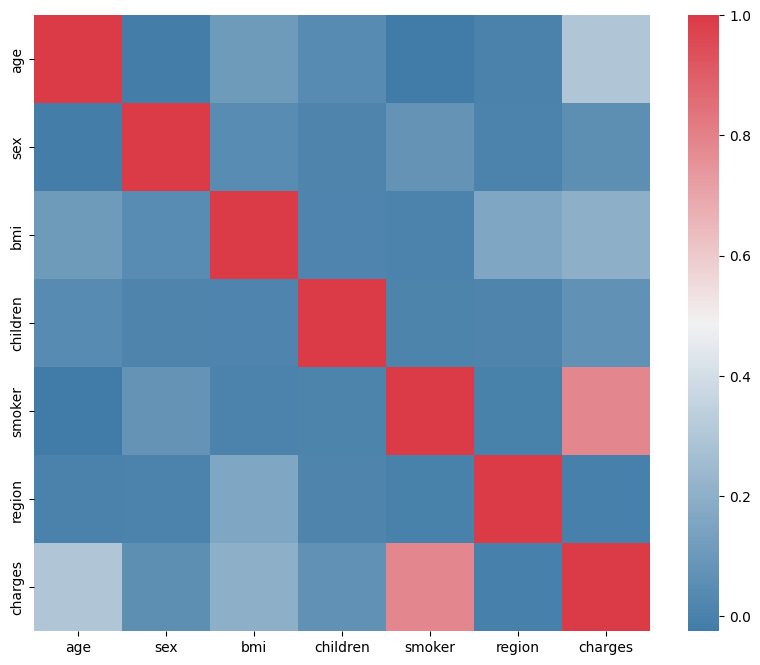

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

Si seguimos analizando la variable smoker, en el siguiente gráfico podemos ver la distribución de costos de las personas fumadoras versus los no fumadores.

/tmp/ipykernel_20403/1912537470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
/tmp/ipykernel_20403/1912537470.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)


Text(0.5, 1.0, 'Distribution of charges for non-smokers')

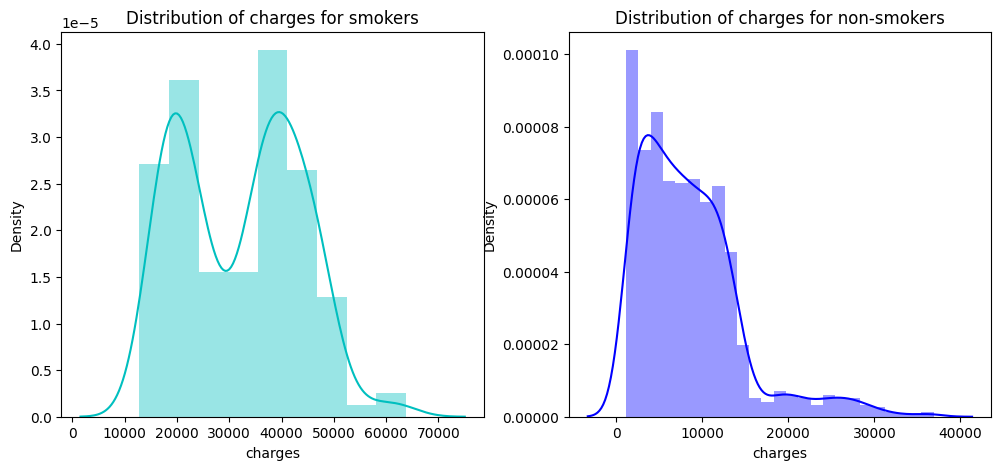

In [16]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(df[(df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Si bien el costo del tratamiento de los fumadores es mucho más elevados, es importante ver la distribución de frecuencias de estos datos.

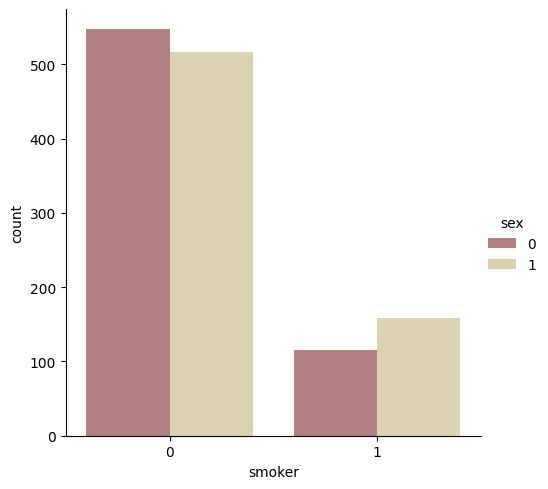

In [17]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=df)

Veamos un box plot a ver si encontramos algo más interesante acerca de los fumadores versus no fumadores.

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

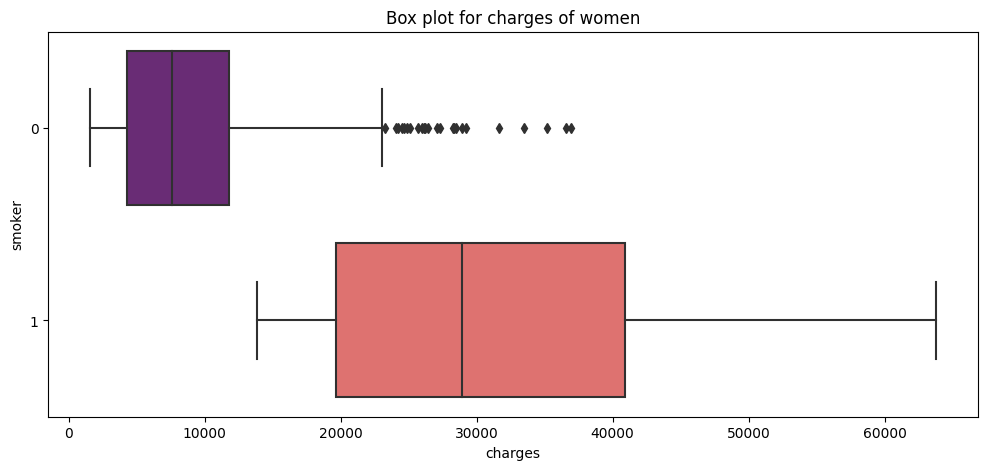

In [18]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 0)] , orient="h", palette = 'magma')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

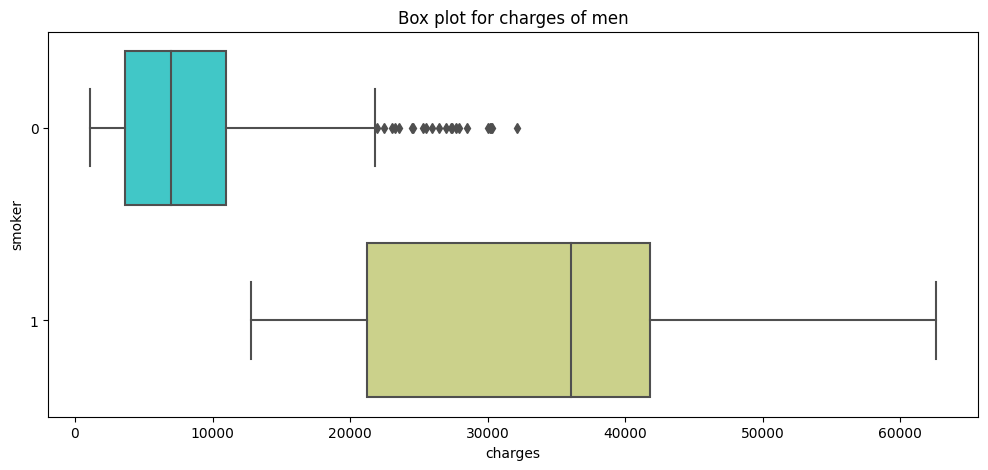

In [19]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'rainbow')

Y si queremos ver el costo de tratamiento en personas de 18 años según si fuman o no?

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

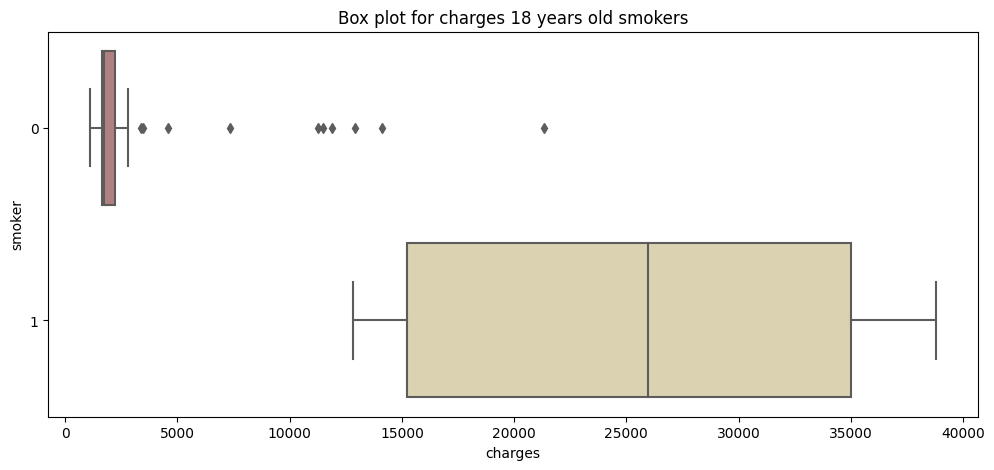

In [20]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'pink')

Interesante, de todas maneras el objetivo de este práctico no es la visualización y análisis así que pasemos a la parte de los modelos.

# Validación de modelos

La validación de modelos de machine learning es una etapa crucial en el proceso de desarrollo de algoritmos para garantizar que el modelo sea capaz de generalizar y obtener buenos resultados en datos no vistos. Existen diversas técnicas de validación, pero a continuación, algunas de las más comunes son:

* Validación cruzada (Cross-validation): Es una técnica que divide el conjunto de datos en k particiones llamadas "folds". Luego, se entrena el modelo k veces, utilizando k-1 folds como datos de entrenamiento y el fold restante como conjunto de validación. Al final de cada iteración, se evalúan las métricas de rendimiento y se obtiene un promedio de las métricas para tener una idea general del rendimiento del modelo.

* Validación de retención (Hold-out validation): Consiste en dividir el conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de prueba (o validación). El modelo se entrena en el conjunto de entrenamiento y se evalúa en el conjunto de prueba. Esta técnica es más simple y rápida que la validación cruzada, pero puede tener una mayor variabilidad en las métricas de rendimiento debido a la división aleatoria de los datos.

* Validación cruzada estratificada (Stratified cross-validation): Es una variante de la validación cruzada que asegura que cada fold tenga una distribución similar de las clases presentes en el conjunto de datos. Es especialmente útil cuando se trabaja con conjuntos de datos desbalanceados, ya que ayuda a garantizar que todas las clases estén representadas adecuadamente en cada fold.

* Validación cruzada anidada (Nested cross-validation): Es una técnica que se utiliza para evaluar de manera más robusta el rendimiento de un modelo y la selección de hiperparámetros. Consiste en aplicar una validación cruzada externa para dividir los datos en conjuntos de entrenamiento y prueba, y dentro de cada fold, se aplica otra validación cruzada interna para seleccionar los hiperparámetros óptimos.

* Bootstrap validation: Implica tomar múltiples muestras con reemplazo del conjunto de datos original y utilizar estas muestras para entrenar y evaluar el modelo. Es útil cuando el tamaño del conjunto de datos es limitado y se busca obtener una estimación robusta del rendimiento del modelo.

Siguiendo la receta de la primera clase, lo primero que hacemos es dividir nuestro conjunto de datos original en las particiones X e y, donde X corresponde a las características que serán pasadas al modelo, mientras que y es la variable objetivo.

In [21]:
X = df.drop(['charges'], axis = 1)
y = df.charges

Luego, para poder medir bien el nivel de generalización del modelo, dividimos el conjunto de datos en entrenamiento y testing.

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 123)

**Regresión Lineal**

Esta es una de las técnicas de regresión más utilizadas en aprendizaje de máquinas. Como se vió en clases, la idea general de este algoritmo en encontrar al recta que mejor se ajusta a un conjunto de datos continuos.

En el caso más simple, cuando queremos describir una variable dependiente `y` según una variable independiente `x`, el problema se reduce a la siguiente ecuación:

$$y = wx + b$$

En el caso general tendremos un conjunto de n variables independientes (features) y 1 variable dependiente, de manera que la ecuación quedará definida como:

$$y = w_{0}x_{0} + w_{1}x_{1} + ... +. w_{n}x_{n} + b$$

El proceso de aprendizaje consiste en encontrar qué conjunto de parámetros $w_{0}, .... , w_{n}$ minimiza el error cuadrático medio entre los valores predichos y los reales.


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression().fit(X_train, y_train)

Luego de entrenar nuestro modelo podemos ver cuáles de los coeficientes son los que más pesan.

In [26]:
lr_vil = pd.DataFrame(lr.coef_,columns=["value"]) # Guardamos en un dataframe los coeficientes
lr_vil.index = df.columns[:-1]
lr_vil

,value
age,258.010521
sex,-89.425006
bmi,343.819658
children,479.316687
smoker,23703.748336
region,-388.434172


In [27]:
y_pred = lr.predict(X_test)

Lo siguiente que debemos hacer es definir cuáles son las métricas que utilizaremos para medir nuestro modelo. En este caso usaremos el error absoluto medio, la raíz del error cuadrático medio, y el coeficiente de determinación, que se definen con las siguientes fórmulas.

$MAE = \frac{1}{m}\sum_{i=1}^{m}|y_{true}-y_{pred}|$

$RSME = \sqrt{\frac{1}{m}\sum_{i=1}^{m}(y_{true}-y_{pred})^2}$

$R^2 = 1 - \frac{\frac{1}{m}\sum_{i=1}^{m}(y_{true}-y_{pred})^2}{\frac{1}{m}\sum_{i=1}^{m}(y_{true}-y_{mean})^2}$

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
 
def compute_metrics(y_true, y_pred):
    """
    Esta función recibe un arreglo de valores reales y predichos para 
    retornar un diccionario con una serie de métricas de regresión
    """
    return {
        'mae': mean_absolute_error(y_true, y_pred),
        'rmse': mean_squared_error(y_true, y_pred) ** 0.5,
        'r2': r2_score(y_true, y_pred)
    }

In [29]:
lr_regression_report = compute_metrics(y_test, y_pred)

In [30]:
lr_regression_report

{'mae': 4199.3349698042575,
 'rmse': 5823.565476334052,
 'r2': 0.7626072475418817}

**Métodos basados en árboles**

Los métodos basados en árboles de decisión son algoritmos de aprendizaje supervisado que se utilizan tanto para problemas de clasificación como de regresión. Estos algoritmos construyen un árbol de decisión a partir del conjunto de datos de entrenamiento, donde cada nodo representa una característica del conjunto de datos y cada rama representa una decisión basada en esa característica. A continuación, se presenta un resumen de los métodos basados en árboles de decisión más comunes:

* Árbol de Decisión Clásico: Es la forma básica de un árbol de decisión, donde cada nodo interno representa una característica del conjunto de datos y cada hoja representa una etiqueta de clasificación o un valor de regresión.

* Random Forest (Bosque Aleatorio): Es un método de conjunto que construye múltiples árboles de decisión y combina sus predicciones para obtener un resultado más robusto y generalizado. Cada árbol se entrena con una muestra aleatoria con reemplazo del conjunto de entrenamiento y también utiliza un subconjunto aleatorio de las características.

* Gradient Boosting: Es otro método de conjunto que también construye múltiples árboles de decisión, pero a diferencia de Random Forest, los árboles se construyen secuencialmente y cada árbol se enfoca en corregir los errores del anterior. Es una técnica potente que puede mejorar el rendimiento de los árboles de decisión, pero también puede ser más propensa a sobreajustar.

* XGBoost (Extreme Gradient Boosting): Es una implementación mejorada y optimizada de Gradient Boosting que utiliza técnicas como la regularización y la poda de árboles para mejorar la generalización y el rendimiento del modelo. Es ampliamente utilizado en competiciones de ciencia de datos debido a su eficiencia y precisión.

* LightGBM (Light Gradient Boosting Machine): Es otra implementación de Gradient Boosting que se destaca por su alta eficiencia y velocidad de entrenamiento. Utiliza el algoritmo de separación de hojas por el gradiente (GOSS) y el algoritmo de crecimiento de hojas por el gradiente (EFB) para reducir el costo computacional del entrenamiento.

* CatBoost: Es otra implementación de Gradient Boosting que se destaca por su capacidad para manejar automáticamente variables categóricas sin la necesidad de codificación previa. También utiliza técnicas como la regularización y la detección temprana de sobreajuste para mejorar el rendimiento del modelo.

In [31]:
from sklearn.model_selection import GridSearchCV

**Random Forest Regressor**

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
param_grid = {
    'n_estimators': [50, 100],       # Número de árboles en el bosque
    'criterion': ['squared_error', 'absolute_error'],         # Criterio para medir la calidad de la división de nodos ('mse': error cuadrático medio, 'mae': error absoluto medio)
    'max_depth': [10, 20],     # Profundidad máxima de los árboles (None: sin límite de profundidad)
    'min_samples_split': [2, 5, 10],     # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2]        # Número mínimo de muestras requeridas en un nodo hoja
}

In [34]:
rf = RandomForestRegressor()


In [35]:
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [10, 20], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]},
             scoring='r2')

In [36]:
# Acceder a los resultados
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
cv_results = grid_search.cv_results_

In [37]:
best_params

{'criterion': 'squared_error',
 'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 50}

In [38]:
df_cv_results = pd.DataFrame(cv_results)

In [39]:
df_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.121717,0.003223,0.005358,0.000222,squared_error,10,1,2,50,"{'criterion': 'squared_error', 'max_depth': 10...",0.858730,0.771738,0.871299,0.831666,0.846136,0.835914,0.034681,45
1,0.244685,0.007732,0.009538,0.001262,squared_error,10,1,2,100,"{'criterion': 'squared_error', 'max_depth': 10...",0.855968,0.777143,0.869752,0.829014,0.857714,0.837918,0.033178,43
2,0.110812,0.001709,0.005502,0.000618,squared_error,10,1,5,50,"{'criterion': 'squared_error', 'max_depth': 10...",0.863074,0.777421,0.880463,0.829547,0.860334,0.842168,0.036291,36
3,0.233385,0.025344,0.008424,0.000823,squared_error,10,1,5,100,"{'criterion': 'squared_error', 'max_depth': 10...",0.861265,0.782517,0.879434,0.833348,0.862946,0.843902,0.034077,33
4,0.115809,0.019795,0.005396,0.000937,squared_error,10,1,10,50,"{'criterion': 'squared_error', 'max_depth': 10...",0.866300,0.789133,0.886465,0.837803,0.861043,0.848149,0.033328,21


In [40]:
y_pred = grid_search.predict(X_test)

In [41]:
rf_vil = pd.DataFrame(list(zip(df.columns[:-1],best_model.feature_importances_)),
             columns=["feature","importance"]
            ).set_index("feature")
rf_vil.sort_values("importance",ascending=False)

,importance
feature,
smoker,0.664564
bmi,0.189393
age,0.124460
children,0.012758
region,0.006718
sex,0.002105


In [42]:
cv_regression_report = compute_metrics(y_test, y_pred)
cv_regression_report

{'mae': 1729.4836977399582,
 'rmse': 3065.003826424925,
 'r2': 0.9342415492980172}

In [51]:
from sklearn.tree import plot_tree

In [52]:
rf_tree = best_model.estimators_[-3]

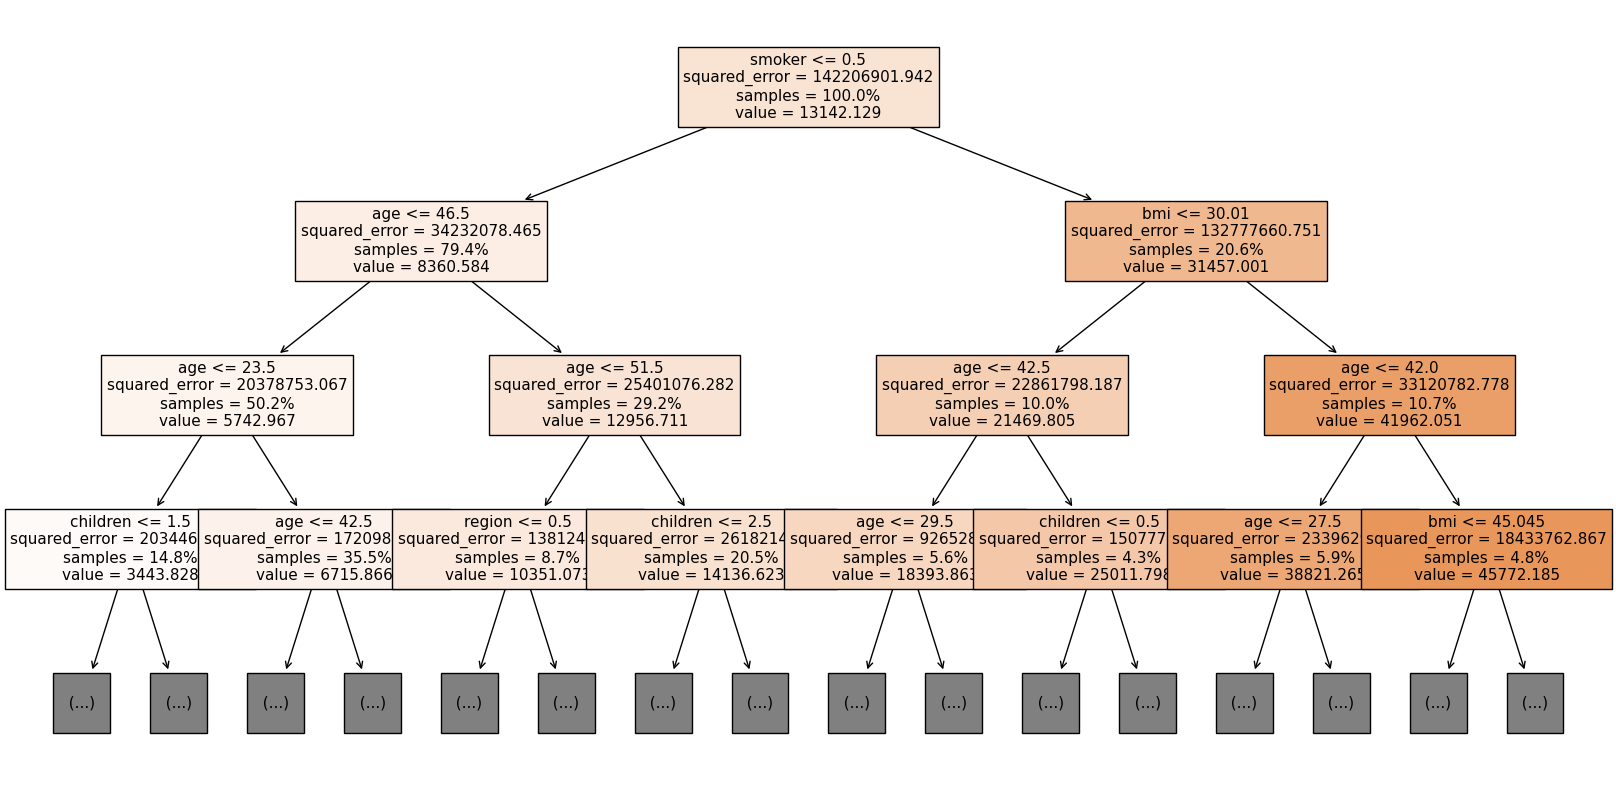

In [53]:
plt.figure(figsize = (20,10))
plot_tree( # Función que nos permite visualizar el árbol de decisión ajustado.
    rf_tree, # Objeto de nuestro árbol de decisión entrenado.
    feature_names = list(X.columns), # Nombres de las variables utilizadas para entrenar.
    class_names = ["healthy","sick"], # Nombre de las clases que estamos prediciendo.
    label = "all", # Etiquetamos todas características de cada nodo.
    proportion = True, # Visualizamos las proporciones de datos en cada nodo de decisión,
    filled=True, # Coloreamos los nodos
    fontsize=11, # Establecemos el tamaño de la letra del texto dentro de cada nodo.,
    max_depth=3 # Profundidad máxima del árbol
)
plt.show()

In [54]:
#!pip install catboost

In [43]:
from catboost import CatBoostRegressor

In [44]:
cb = CatBoostRegressor(learning_rate =0.01, max_depth =5, verbose = 0)

cb.fit(X_train, y_train)

In [45]:
y_pred = cb.predict(X_test)

In [46]:
cat_regression_report=compute_metrics(y_test, y_pred)

In [47]:
performances = pd.DataFrame( # Consolidamos todas las métricas en un DatFrame
    data = [
        lr_regression_report,
        cv_regression_report,
        cat_regression_report
    ],
    index = [
        "Linear Regression",
        "Grilla RF",
        "CatBoostRegressor"
    ]
).sort_values( # Ordenamos los valores
    by="rmse"
)
performances

,mae,rmse,r2
Grilla RF,1488.744812,3515.609364,0.913485
CatBoostRegressor,2432.052809,4183.128945,0.877512
Linear Regression,4199.334970,5823.565476,0.762607


### ¿Como hacer esta grilla pero para mas modelos y sus parametros?

In [48]:
# Definir los modelos que deseas evaluar
models = [
    {
        'model': CatBoostRegressor(),
        'param_grid': {
            'learning_rate': [0.01, 0.1],
            'depth': [4, 6],
            'iterations': [50, 100],
        }
    },
    {
        'model': RandomForestRegressor(),
        'param_grid': {
            'n_estimators': [50, 100],
            'max_depth': [ 10, 20],
        }
    },
    {
        'model': LinearRegression(),
        'param_grid': {
            'fit_intercept': [True, False]
        }
    }
]

# Realizar la búsqueda de hiperparámetros y validación cruzada para cada modelo
for model_info in models:
    model = model_info['model']
    param_grid = model_info['param_grid']
    
    grid_search_v2 = GridSearchCV(model, param_grid, cv=5)
    grid_search_v2.fit(X, y)

    print("Model:", model)
    print("Best Parameters:", grid_search_v2.best_params_)
    print("Best Score:", grid_search_v2.best_score_)
    print("--------------------------------------")



0:	learn: 11927.0878035	total: 546us	remaining: 26.8ms
1:	learn: 11835.4445196	total: 1.14ms	remaining: 27.3ms
2:	learn: 11746.6047839	total: 1.5ms	remaining: 23.4ms
3:	learn: 11658.0386428	total: 1.85ms	remaining: 21.3ms
4:	learn: 11574.7668941	total: 2.2ms	remaining: 19.8ms
5:	learn: 11484.4153025	total: 2.58ms	remaining: 18.9ms
6:	learn: 11399.6562064	total: 2.94ms	remaining: 18ms
7:	learn: 11312.0844664	total: 3.28ms	remaining: 17.2ms
8:	learn: 11232.7862121	total: 3.63ms	remaining: 16.5ms
9:	learn: 11150.9721518	total: 3.96ms	remaining: 15.8ms
10:	learn: 11072.2809596	total: 4.34ms	remaining: 15.4ms
11:	learn: 10992.1286145	total: 4.67ms	remaining: 14.8ms
12:	learn: 10912.3386896	total: 5.01ms	remaining: 14.3ms
13:	learn: 10831.9175409	total: 5.37ms	remaining: 13.8ms
14:	learn: 10760.8173714	total: 5.7ms	remaining: 13.3ms
15:	learn: 10685.9861896	total: 6ms	remaining: 12.7ms
16:	learn: 10610.1560992	total: 6.34ms	remaining: 12.3ms
17:	learn: 10531.6758294	total: 6.71ms	remaining: 